In [37]:
import pandas as pd
import matplotlib.pyplot as plt

def get_pct_of_nulls(df):
    return df.isnull().sum()/len(df) * 100

df = pd.read_csv('default_of_credit_card_clients.csv')
df.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [8]:
# Practicamente todas las columnas les falta algun dato
df.isnull().any()

ID     False
X1     False
X2      True
X3      True
X4      True
X5      True
X6      True
X7      True
X8      True
X9      True
X10     True
X11     True
X12     True
X13     True
X14     True
X15     True
X16     True
X17     True
X18     True
X19     True
X20     True
X21     True
X22     True
X23     True
Y       True
dtype: bool

Porcentaje de datos faltantes

In [38]:
get_pct_of_nulls(df)

ID     0.000000
X1     0.000000
X2     0.003333
X3     0.006667
X4     0.006667
X5     0.016667
X6     0.010000
X7     0.016667
X8     0.023333
X9     0.030000
X10    0.053333
X11    0.046667
X12    0.036667
X13    0.036667
X14    0.043333
X15    0.050000
X16    0.056667
X17    0.033333
X18    0.026667
X19    0.030000
X20    0.026667
X21    0.036667
X22    0.036667
X23    0.016667
Y      0.010000
dtype: float64

In [39]:
df1 = df.dropna(thresh=20)
get_pct_of_nulls(df1)

ID     0.000000
X1     0.000000
X2     0.000000
X3     0.000000
X4     0.000000
X5     0.010004
X6     0.000000
X7     0.000000
X8     0.006669
X9     0.013339
X10    0.026677
X11    0.020008
X12    0.000000
X13    0.000000
X14    0.003335
X15    0.010004
X16    0.016673
X17    0.003335
X18    0.000000
X19    0.003335
X20    0.000000
X21    0.010004
X22    0.010004
X23    0.006669
Y      0.000000
dtype: float64

Se observa que aún despues de filtrar los registros que eran null en su mayoría, aun quedan varios registros en la columna X10 = repayment status in May, 2005

count    29980.000000
mean        -0.266378
std          1.133250
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: X10, dtype: float64

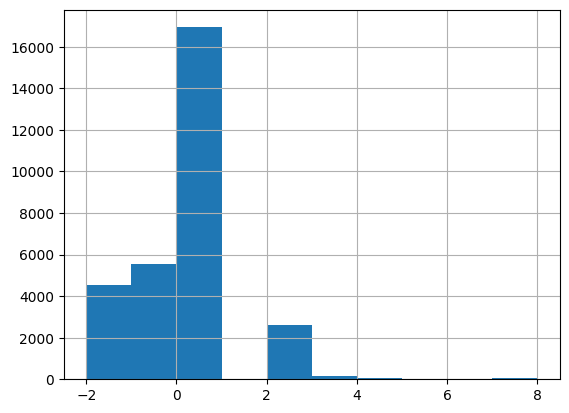

In [42]:
df1['X10'].hist()
df1['X10'].describe()

La mayoria de los casos son 0 en este mes, podemos reemplazarlos por este


In [46]:
x10_mode = df1['X10'].mode()
x10_mode

0    0.0
Name: X10, dtype: float64

In [73]:
df2 = df1
df2.loc['X10'] = df2['X10'].fillna(x10_mode)
get_pct_of_nulls(df2)

C:\Users\elmer\AppData\Local\Temp\ipykernel_39952\2106631979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc['X10'] = df2['X10'].fillna(x10_mode)


ID     0.003335
X1     0.003335
X2     0.003335
X3     0.003335
X4     0.003335
X5     0.013338
X6     0.003335
X7     0.003335
X8     0.010004
X9     0.016673
X10    0.030011
X11    0.023342
X12    0.003335
X13    0.003335
X14    0.006669
X15    0.013338
X16    0.020007
X17    0.006669
X18    0.003335
X19    0.006669
X20    0.003335
X21    0.013338
X22    0.013338
X23    0.010004
Y      0.003335
dtype: float64

Después de rellenar los valores nulos en la columna X10 por la moda, podemos tirar el resto de los valores al representar menos del 1%

In [90]:
df3 = df2.dropna()
get_pct_of_nulls(df3)

ID     0.0
X1     0.0
X2     0.0
X3     0.0
X4     0.0
X5     0.0
X6     0.0
X7     0.0
X8     0.0
X9     0.0
X10    0.0
X11    0.0
X12    0.0
X13    0.0
X14    0.0
X15    0.0
X16    0.0
X17    0.0
X18    0.0
X19    0.0
X20    0.0
X21    0.0
X22    0.0
X23    0.0
Y      0.0
dtype: float64

count      29958.000000
mean      167555.900928
std       129737.299088
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: X1, dtype: float64

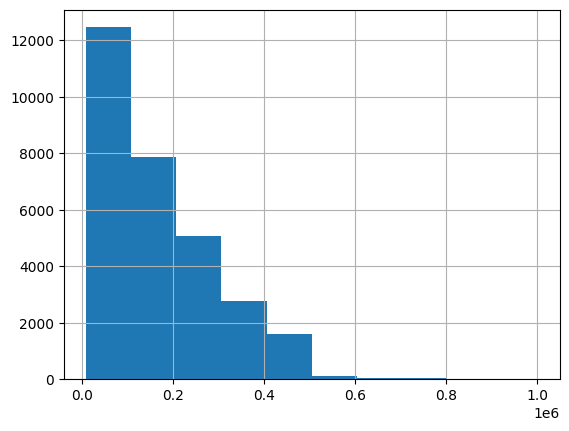

In [77]:
# monto de crédito otorgado
df3['X1'].hist()
df3['X1'].describe()

Además hay que arreglar algunos de los valores inválidos para estudios

C:\Users\elmer\AppData\Local\Temp\ipykernel_39952\3221572955.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['X3'] = df3['X3'].replace([0,5,6],4)


count    29958.000000
mean         1.842212
std          0.744557
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: X3, dtype: float64

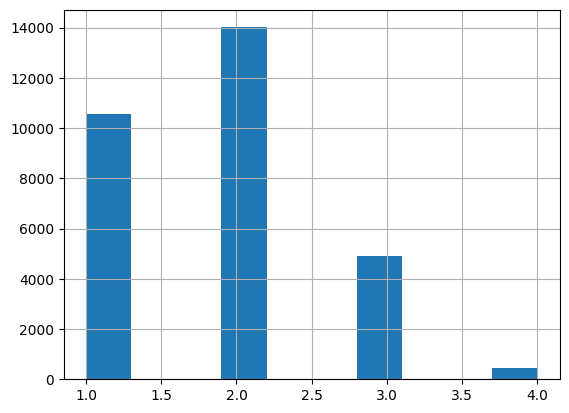

In [94]:
df3['X3'] = df3['X3'].replace([0,5,6],4)
df3['X3'].value_counts()

# Educacion
df3['X3'].hist()
df3['X3'].describe()

count    29958.000000
mean        -0.291575
std          1.149303
min         -2.000000
25%         -1.000000
50%          0.000000
75%          0.000000
max          8.000000
Name: X11, dtype: float64

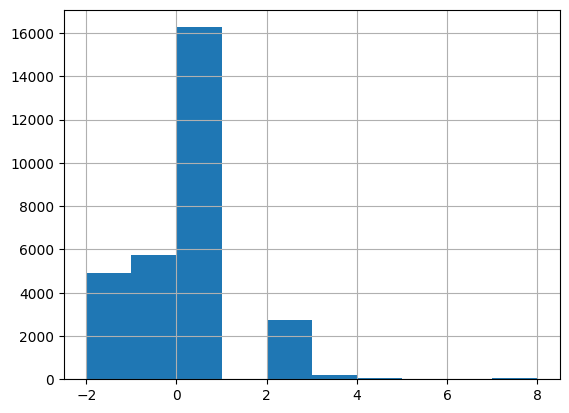

In [98]:
# Repayment status
df3['X11'].hist()
df3['X11'].describe()

¿Qué datos considero más importantes? ¿Por qué?
De los datos con mayor relevancia para el estudio son:
El monto total de crédito otorgado(X1), ya que fija una base a partir de la cual podemos relacionar esta variable junto con otras como el historial de pagos (X6 – X11), retrasos en pagos, edad.
Además, la educación parece tener relevancia ya que la mayoría tiene una educación Universitaria.


¿Se eliminaron o reemplazaron datos nulos? ¿Qué se hizo y por qué?
Reemplace algunos de los datos por la moda en los casos pertinentes, además de recategorizar algunos de universidad que excedían el rango de las opciones válidas, es decir, si eran “Otros” debían estar en 4, no en 5 o 6 (opciones inexistentes)


¿Es necesario limpiar los datos para el análisis? Sí / No / ¿Por qué?
Si, ya que muchos modelos no aceptan valores nulos, tenían una representación mínima al principio (> 2%) y además desconocemos si son faltantes de tipo MNAR.


¿Existen problemas de formato que deban solucionar antes del proceso de modelado? Sí / No / Por qué.
Si, algunos datos como Educación contenían valores inválidos, lo cual puede afectar el resultado del modelo. Además de los datos de series de tiempo que están en formato tabular, cuando los necesitamos junto con sus fechas (aproximadas) en otro formato.


¿Qué ajustes se realizaron en el proceso de limpieza de datos (agregar, integrar, eliminar, modificar registros (filas), cambiar atributos (columnas)?
•	Análisis
o	Se reviso primero la cantidad de datos nulos usando un método para poder revisar constantemente
•	Modificar registros
o	X10 se reemplazaron los faltantes por 0, ya que era la moda
o	Educación se recategorizaron los valores fuera del rango válido (1-4)
•	Eliminar
o	Se eliminaron los registros que tuvieran <20 en 0
o	Se eliminaron los registros totalmente en 0